Esercizio 1
Sul database titanic, effettuiamo le seguenti analisi:
Riusciamo a calcolare quanti ponti c'erano sulla nave (prima lettera dei dati nella colonna Cabin)?
Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco (colonna PClass)
Fare la stessa cosa per la colonna Survived
Qual era la distribuzione delle tariffe (Fare)?
Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco con un boxplot?
Visualizziamo un boxplot rispetto alle colonne Fare e Survived; che cose ne deduciamo?

In [3]:
import os
from dotenv import load_dotenv
import sqlalchemy
import pandas as pd

env_path = "C:\\Users\\Franco\\cred.env" 
load_dotenv(dotenv_path=env_path, override=True)

username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbname2")

connection_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"

db_engine = sqlalchemy.create_engine(connection_string)

In [4]:
query = "SELECT * FROM titanic"
df = pd.read_sql(query, db_engine)
df

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,,S,0,10-4-1912
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,1,11-4-1912
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,0,10-4-1912
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,,S,0,10-4-1912


In [5]:
#Stampo le prime righe del dataset
df.head()

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912


In [6]:
#Visualizzo le informazioni generali per ogni singola colonna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   PClass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Survived     1309 non-null   int64  
 12  EmbarkDate   1309 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB


In [7]:
#Analisi delle colonne numeriche
df.describe()

,PassengerId,PClass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,23.877517,0.498854,0.385027,33.270825,0.372804
std,378.020061,0.837836,17.590845,1.041658,0.865560,51.747086,0.483735
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,7.000000,0.000000,0.000000,7.900000,0.000000
50%,655.000000,3.000000,24.000000,0.000000,0.000000,14.450000,0.000000
75%,982.000000,3.000000,35.000000,1.000000,0.000000,31.280000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.330000,1.000000


In [11]:
#Analisi delle colonne categoriche
for column in df.columns:
    if df[column].dtype == "object":
        print ("La colonna", column, "contiene dati categorici")
        unique_count = df[column].nunique()
        print("La colonna", column, "contiene", unique_count, "valori unici")
        all_count = df[column].value_counts()
        print ("La distribuzione di ogni valore unico è")
        print(all_count)
        print()

La colonna Name contiene dati categorici
La colonna Name contiene 1307 valori unici
La distribuzione di ogni valore unico è
Name
Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: count, Length: 1307, dtype: int64

La colonna Sex contiene dati categorici
La colonna Sex contiene 2 valori unici
La distribuzione di ogni valore unico è
Sex
male      843
female    466
Name: count, dtype: int64

La colonna Ticket contien

In [12]:
#Calcolo i valori nulli
df.isna().sum() #Qua mi viene restituito che nessuna colonna possiede valori nulli, anche se vediamo che per la colonna "Cabin" alcuni dati non sono valorizzati.
#La maggior parte dei valori mancanti nella colonna Cabin corrisponde a passeggeri di seconda e terza classe, i quali spesso non avevano una cabina assegnata.

PassengerId    0
PClass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
EmbarkDate     0
dtype: int64

In [14]:
#Calcolo quanti ponti erano presenti sulla nave
df["Deck"] = df["Cabin"].dropna().astype(str).str[0] #Converte tutti i valori in stringhe, compresi i valori mancanti NaN, che diventano la stringa "nan", e per evitare che venga trattata come ponte "n"
conteggio_ponti = df['Deck'].value_counts() #Calcola i conteggi ignorando automaticamente i NaN
conteggio_ponti

Deck
C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: count, dtype: int64

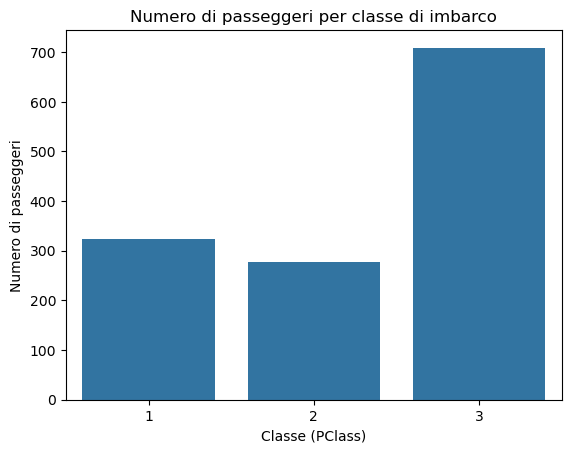

In [16]:
#Visualizzo un grafico con il numero di passeggeri di ogni classe di imbarco 
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x="PClass")
plt.title("Numero di passeggeri per classe di imbarco")
plt.xlabel("Classe (PClass)")
plt.ylabel("Numero di passeggeri")

plt.show() 

Dal grafico si evidenzia che il maggior numero di passeggeri apparteneva alla terza classe (circa 700). 
Circa poco più di 300 appartenevano alla prima classe e circa poco meno di 300 appartenevano alla seconda classe. Questo spiega anche il fatto per cui molti valori
della colonna Cabin non sono popolati

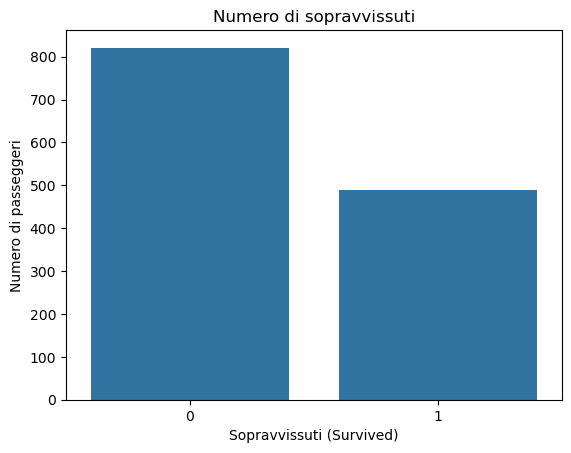

In [18]:
#Visualizzo un grafico con il numero di sopravvissuti

sns.countplot(data=df, x="Survived")
plt.title("Numero di sopravvissuti")
plt.xlabel("Sopravvissuti (Survived)")
plt.ylabel("Numero di passeggeri")

plt.show() 
#Dal grafico si evidenzia che la maggior parte dei passeggeri non è sopravvissuta all'incidente

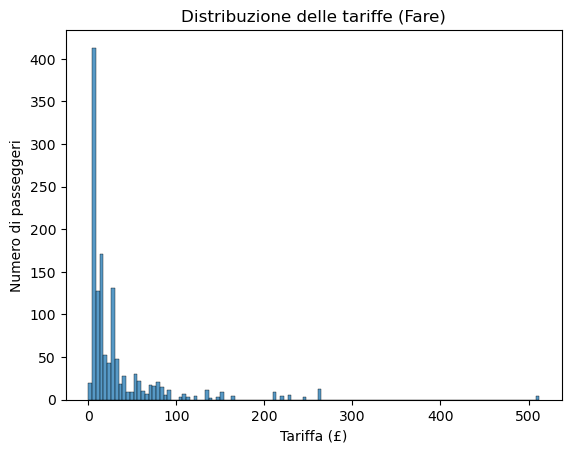

In [19]:
#Distribuzione delle tariffe
sns.histplot(data=df, x="Fare")

plt.title("Distribuzione delle tariffe (Fare)")
plt.xlabel("Tariffa (£)")
plt.ylabel("Numero di passeggeri")

plt.show()

Il grafico mostra una distribuzione asimmetrica e fortemente sbilanciata verso sinistra delle tariffe.
La maggior parte dei passeggeri ha pagato una tariffa molto bassa, inferiore alle 50 unità monetarie, con un picco evidente intorno a valori molto prossimi a 0.
Al crescere della tariffa, il numero di passeggeri diminuisce rapidamente e, solo pochi passeggeri hanno pagato biglietti particolarmente costosi (fino a oltre 500).
Questo riflette la disparità socio-economica a bordo: i passeggeri di terza classe pagavano poco, mentre quelli di prima classe potevano permettersi tariffe molto più alte.

In [22]:
df["Fare"].describe()

count    1309.000000
mean       33.270825
std        51.747086
min         0.000000
25%         7.900000
50%        14.450000
75%        31.280000
max       512.330000
Name: Fare, dtype: float64

<Axes: xlabel='PClass', ylabel='Age'>

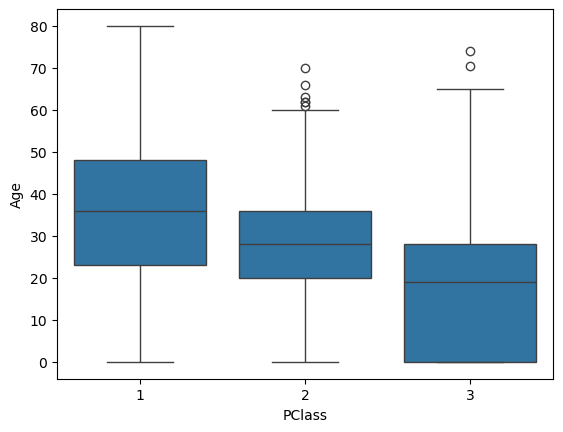

In [21]:
#Distribuzione delle età dei passeggeri rispetto alla classe di imbarco
sns.boxplot(data=df, x="PClass", y="Age")

Il boxplot mostra che i passeggeri di prima classe tendono ad avere un’età mediamente più alta rispetto a quelli di seconda e terza classe.
Suggerisce che i passeggeri delle classi più alte tendevano a essere più adulti, mentre quelli delle classi più basse erano in media più giovani o famiglie numerose con bambini.
Nella terza classe, la maggior parte dei passeggeri è giovane, con diversi bambini (età vicine allo 0).
Sono presenti alcuni outlier, soprattutto nelle classi seconda e terza, che rappresentano passeggeri con età insolitamente alte per quelle categorie.

<Axes: xlabel='Survived', ylabel='Fare'>

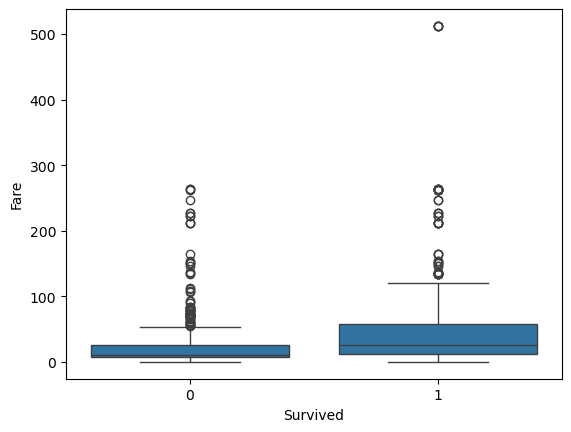

In [24]:
#Visualizzo un boxplot rispetto alle colonne Fare e Survived
sns.boxplot(data=df, x="Survived", y="Fare")

Il grafico mostra che la porzione di coloro che non sono sopravvissuti sono coloro che hanno pagato in media tariffe più basse (box stretto e compatto). 
Ci sono però dei valori outlier che mostrano che anche tra chi aveva pagato una tariffa alta non è sopravvissuto all'incidente.
La porzione di coloro che invece sono sopravvissuti hanno una distribuzione più alta e più variabile. Presentano anche outlier molto elevati.
Questo suggerisce che i passeggeri delle classi più alte, che pagavano di più,sono stati favoriti nei soccorsi rispetto a quelli delle classi più basse.

Esercizio 2
Scarichiamo il dataset stockdata.csv da https://github.com/plotly/datasets/blob/master/stockdata.csv e:
Visualizziamo l'andamento delle azioni della Apple ("AAPL")
Visualizziamo l'andamento di tutte le azioni del dataset
Visualizziamo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013
Con un istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso

In [117]:
df = pd.read_csv("C:\\Users\\Franco\\Desktop\\Leti\\stockdata.csv")
df

,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09
...,...,...,...,...,...,...
2301,51.360001,132.800003,58.110001,96.099998,1929.800049,2016-02-24
2302,52.099998,134.500000,58.750000,96.760002,1951.699951,2016-02-25
2303,51.299999,132.029999,58.340000,96.910004,1948.050049,2016-02-26
2304,50.880001,131.029999,58.209999,96.690002,1932.229980,2016-02-29


In [118]:
#Visualizzo le prime righe del dataset
df.head()

,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09


In [119]:
#Visualizzo le informazioni generali per ogni singola colonna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    2306 non-null   float64
 1   IBM     2306 non-null   float64
 2   SBUX    2306 non-null   float64
 3   AAPL    2306 non-null   float64
 4   GSPC    2306 non-null   float64
 5   Date    2306 non-null   object 
dtypes: float64(5), object(1)
memory usage: 108.2+ KB


In [120]:
#Analisi delle colonne numeriche
df.describe()

,MSFT,IBM,SBUX,AAPL,GSPC
count,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000
mean,28.737785,136.239600,23.213089,54.719810,1459.999869
std,9.471737,37.376360,15.522634,34.645282,361.673516
min,12.630211,61.274273,3.284911,10.345740,676.530029
25%,22.582537,102.407469,10.792787,22.929971,1198.417481
50%,24.990737,143.833125,17.896952,49.327484,1402.370056
75%,33.873379,172.566340,35.305682,78.102594,1770.579986
max,56.146870,198.948796,63.098822,130.671320,2130.820068


In [121]:
#Visualizzo l'andamento delle azioni della Apple ("AAPL")
df["Date"] = pd.to_datetime(df["Date"])

In [122]:
df["Year"] = df["Date"].dt.year

In [123]:
df_AAPL = df.groupby("Year")["AAPL"].sum()
df_AAPL

Year
2007     4259.580755
2008     4752.252307
2009     4894.667655
2010     8662.943461
2011    12135.618214
2012    19098.854725
2013    16113.320526
2014    22551.095511
2015    29841.582818
2016     3873.966517
Name: AAPL, dtype: float64

Text(0.5, 1.0, 'Andamento delle azioni Apple')

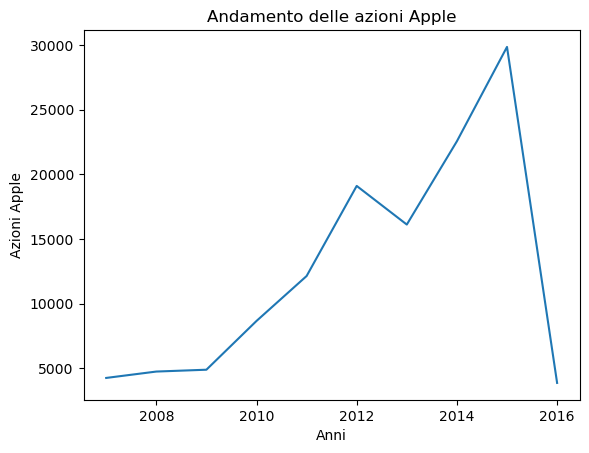

In [124]:
import matplotlib.pyplot as plt

df_AAPL.plot()
plt.xlabel("Anni")
plt.ylabel("Azioni Apple")
plt.title("Andamento delle azioni Apple") 

Le azioni della Apple hanno subito un improvviso calo verso fine 2015, dopo un periodo di crescita avuto a partire dal 2013.
Negli anni precedenti c'è stata una crescita da circa il 2009, per poi subire un picco nel 2012 durato fino al 2013 quando poi si è verificata la crescita citata prima

In [127]:
#Visualizzo l'andamento di tutte le azioni del dataset
df_azioni = df.groupby("Year")[["MSFT", "IBM", "SBUX", "AAPL", "GSPC"]].sum()
df_azioni

,MSFT,IBM,SBUX,AAPL,GSPC
Year,,,,,
2007,6173.450481,22147.238391,3247.347270,4259.580755,370773.269896
2008,5521.527430,23562.423909,1763.836701,4752.252307,308670.640078
2009,4861.084585,23796.035947,1816.102055,4894.667655,238907.689755
2010,5833.423402,29250.110154,3038.749959,8662.943461,287271.309137
2011,5751.136665,38591.792755,4466.203355,12135.618214,319444.979986
2012,6709.368970,44754.909853,6086.052506,19098.854725,344838.539916
2013,7598.324210,45342.266657,8190.946260,16113.320526,414237.339965
2014,10215.668026,43512.052048,9302.103788,22551.095511,486706.779656
2015,11540.226564,38118.882400,13305.342051,29841.582818,519389.070793


Text(0.5, 1.0, 'Andamento delle azioni')

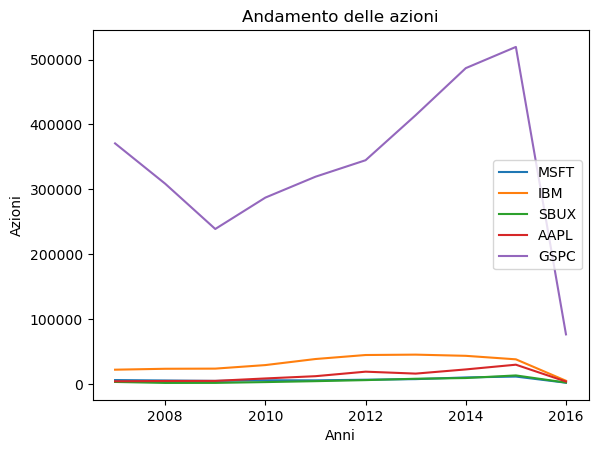

In [129]:
df_azioni.plot()
plt.xlabel("Anni")
plt.ylabel("Azioni")
plt.title("Andamento delle azioni") 

Le azioni di GSPC salgono in modo costante dal 2009 al 2015, con un calo drastico nel 2016
Le azioni AAPL mostrano una crescita tra il 2010 e il 2015
Le azioni di IBM crescono fino circa al 2013-2014 e poi decrescono nel 2015-2016
Le azioni di MSFT risultano piatte nei primi anni, con un piccolo aumento nel 2014-2015
Le azioni di SBUX sono molto stabili, ma con un leggero trend di crescita

In [142]:
#Visualizzo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013
filtro = df["Year"].between(2012, 2013)
df_filtrato = df.loc[filtro, ["Year", "MSFT", "IBM"]]
df_filtrato

,Year,MSFT,IBM
1260,2012,23.773104,168.200853
1261,2012,24.332575,167.514678
1262,2012,24.581230,166.720180
1263,2012,24.963092,164.806130
1264,2012,24.634512,163.948426
...,...,...,...
1757,2013,34.884738,171.468856
1758,2013,35.223422,173.462249
1759,2013,35.082304,173.209562
1760,2013,35.082304,174.454262


In [148]:
df_MSFT_IBM = df_filtrato.groupby("Year")[["MSFT", "IBM"]].sum()
df_MSFT_IBM

,MSFT,IBM
Year,,
2012,6709.36897,44754.909853
2013,7598.32421,45342.266657


Text(0.5, 1.0, 'Andamento delle azioni Microsoft e IBM')

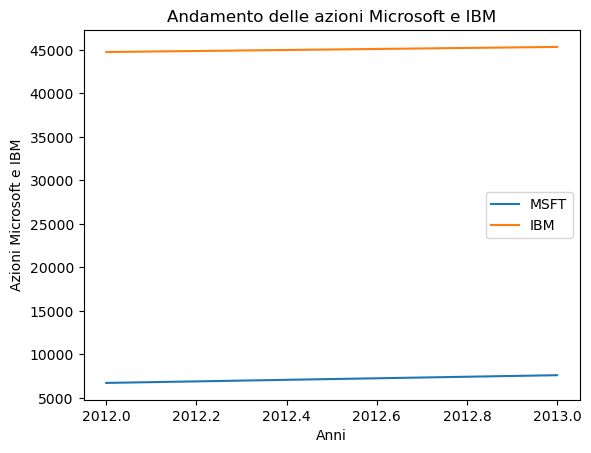

In [149]:
df_MSFT_IBM.plot()
plt.xlabel("Anni")
plt.ylabel("Azioni Microsoft e IBM")
plt.title("Andamento delle azioni Microsoft e IBM")

Tra il 2012 e il 2013, le azioni di Microsoft e IBM non hanno avuto variazioni significative.
Questo potrebbe indicare una fase di stabilità per entrambi i titoli in quel periodo.

<Axes: ylabel='Frequency'>

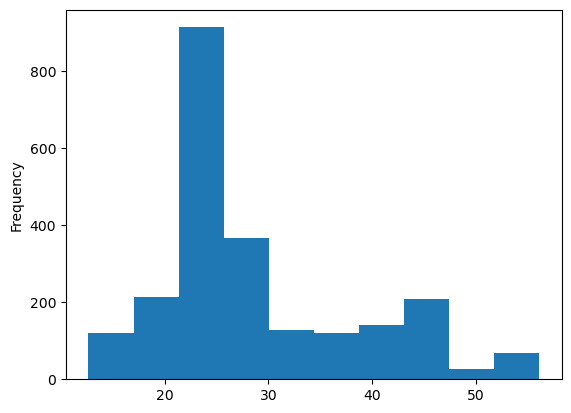

In [150]:
#Trovo il range di valori che le azioni di Microsoft hanno assunto più spesso
df.MSFT.plot(kind="hist")

Il valore che MSFT ha assunto più spesso è intorno a 22.
È probabile che in quel range abbia stazionato spesso, o che ci siano stati molti giorni con prezzo vicino a quel valore.

Esercizio 3
Scarichiamo il dataset metal_bands_2017.csv dalla piattaforma e:
Con Seaborn visualizziamo l'istogramma del numero dei fan delle varie band; cosa si vede? Cose ne deduciamo?
Delle band che suonano sia Progressive che Thrash, realizziamo un barplot che mostri quanti fan ci sono in totale rispetto al paese di origine
(nota: in questo caso specifico, per accedere alla colonna "style" dovremo usare .loc[:, "style"] e non .style perché quest'ultimo è un metodo)
Visualizziamo un istogramma delle date di formazione delle band (potremo dover convertire in qualche modo questo dato); si nota qualche trend?

In [162]:
df = pd.read_csv("C:\\Users\\Franco\\Desktop\\Leti\\metal_bands_2017.csv", encoding="latin1")
df

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...,...
4995,4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


In [164]:
(df.index == df["Unnamed: 0"]).all() #Confronto se tutti i valori dell'indice e la colonna Unnamed: 0 coincidono riga per riga
#Se restituisce true setto la colonna Unnamed: 0 come indice

True

In [165]:
df.set_index("Unnamed: 0", inplace=True)

In [166]:
df.head()

,band_name,fans,formed,origin,split,style
Unnamed: 0,,,,,,
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   band_name  5000 non-null   object
 1   fans       5000 non-null   int64 
 2   formed     5000 non-null   object
 3   origin     4992 non-null   object
 4   split      5000 non-null   object
 5   style      5000 non-null   object
dtypes: int64(1), object(5)
memory usage: 273.4+ KB


In [168]:
df.describe()

,fans
count,5000.000000
mean,87.805800
std,296.137523
min,0.000000
25%,4.000000
50%,12.000000
75%,42.000000
max,4195.000000


In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='fans', ylabel='Count'>

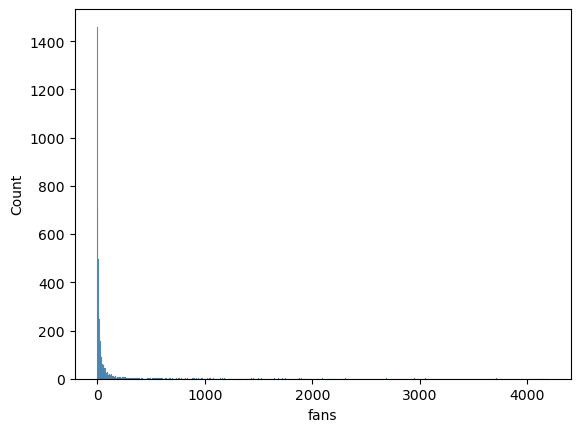

In [180]:
#Visualizzo l'istogramma del numero dei fan delle varie band
sns.histplot(data=df, x="fans")

Il grafico istogramma non è adatto per questo tipo di visualizzazione, converrebbe usare un grafico a barre. 
Da questo grafico si deduce che la maggioranza delle band ha pochissimi fan, vicini allo zero.
Ci sono pochissime band con tanti fan (oltre 1000), ma sono eccezioni e formano una lunga coda verso destra.

In [182]:
#Realizzo un barplot che mostra quanti fan ci sono in totale rispetto al paese di origine delle band che suonano sia Progressive che Thrash
filtro_progressive = df["style"].str.contains("Progressive", case=False, na=False)
filtro_thrash = df["style"].str.contains("Thrash,", case=False, na=False)
filtro = filtro_progressive & filtro_thrash
df_filtrato = df[filtro]
df_filtrato

,band_name,fans,formed,origin,split,style
Unnamed: 0,,,,,,
112,Meshuggah,970,1987,Sweden,-,"Technical thrash,Math,Progressive"
116,Machine Head,957,1992,USA,-,"Groove thrash,Progressive thrash"
242,Vektor,387,2002,USA,-,"Technical thrash,Progressive thrash"
359,Voivod,243,1982,Canada,1982,"Thrash,Progressive"
834,Stam1na,78,1996,Finland,-,"Alternative thrash,Progressive"
913,Conception,69,1989,Norway,1989,"Thrash,Progressive,Power"
1371,Waltari,37,1986,Finland,1986,"Progressive thrash,Avantgarde,Alternative,Symp..."
1409,Kahtmayan,35,1998,Iran,1998,"Progressive,Thrash,Instrumental"
1812,Black Fast,22,2010,USA,-,"Thrash,Progressive black"


In [184]:
df_raggruppato = df_filtrato.groupby("origin")[["fans", "band_name"]].sum()
df_raggruppato 

,fans,band_name
origin,,
Canada,246,VoivodTribuneVarga
Chile,19,Coprofago
Finland,126,Stam1naWaltariMalpractice
France,10,Outcast
Iran,35,Kahtmayan
Italy,3,Aleph
Lebanon,10,Blaakyum
Norway,69,Conception
Portugal,4,Disaffected


In [193]:
df_raggruppato = df_raggruppato.reset_index()

Text(0, 0.5, 'Band')

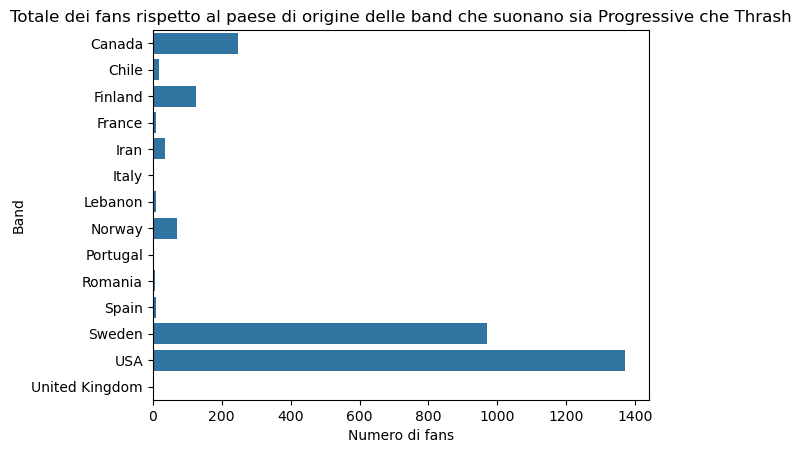

In [195]:
sns.barplot(data=df_raggruppato, x="fans", y="origin")
plt.title("Totale dei fans rispetto al paese di origine delle band che suonano sia Progressive che Thrash")
plt.xlabel("Numero di fans")
plt.ylabel("Paese di origine")

Tra le band che suonano sia Progressive sia Thrash, quelle che hanno il maggior numero di fans sono quelle con origine in USA, seguite da quelle 
originarie della Svezia

In [197]:
df["formed"] = pd.to_datetime(df["formed"], errors="coerce")

In [198]:
df

,band_name,fans,formed,origin,split,style
Unnamed: 0,,,,,,
0,Iron Maiden,4195,1975-01-01,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990-01-01,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981-01-01,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983-01-01,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988-01-01,Sweden,-,Melodic death
...,...,...,...,...,...,...
4995,Atara,0,2006-01-01,France,2006,"Black,Grindcore"
4996,Avicularia,0,2003-01-01,Croatia,-,Avantgarde death
4997,Awake,0,2006-01-01,United Kingdom,2006,"Heavy,Progressive"


Text(0, 0.5, 'Numero di band')

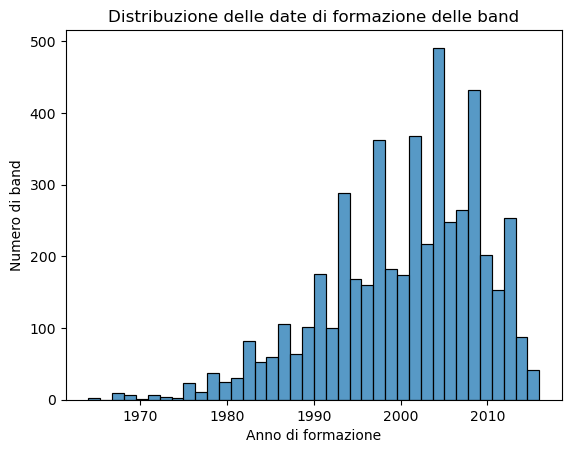

In [199]:
#Visualizzo un istogramma delle date di formazione delle band
sns.histplot(data=df, x="formed")
plt.title("Distribuzione delle date di formazione delle band")
plt.xlabel("Anno di formazione")
plt.ylabel("Numero di band")

L'istogramma mostra una crescita costante delle band dal 1970, dove ce ne erano pochissime, agli anni 2000.
A cominciare dai primi anni 2000, si è osservato una rapida crescita di band. Nel 2005 c'è stato un picco, per poi subire un calo a partire dal 2010.

Esercizio 4
Scarichiamo il dataset elections.csv da https://github.com/plotly/datasets/blob/master/election.csv:
Con un grafico a barre confrontiamo i voti totali presi dai tre candidati (come somma di tutti i distretti)
Con un grafico a barre confrontiamo il numero di votanti per i primi dieci distretti

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [200]:
df = pd.read_csv("C:\\Users\\Franco\\Desktop\\Leti\\election.csv")
df

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112
5,113-Jeanne-Mance,1455,3599,2316,7370,Bergeron,plurality,113
6,12-Saint-Sulpice,3252,2521,2543,8316,Coderre,plurality,12
7,121-La Pointe-aux-Prairies,5456,1760,3330,10546,Coderre,majority,121
8,122-Pointe-aux-Trembles,4734,1879,2852,9465,Coderre,majority,122
9,123-Rivière-des-Prairies,5737,958,1656,8351,Coderre,majority,123


In [201]:
df.head()

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   district     58 non-null     object
 1   Coderre      58 non-null     int64 
 2   Bergeron     58 non-null     int64 
 3   Joly         58 non-null     int64 
 4   total        58 non-null     int64 
 5   winner       58 non-null     object
 6   result       58 non-null     object
 7   district_id  58 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 3.8+ KB


In [203]:
df.describe()

,Coderre,Bergeron,Joly,total,district_id
count,58.000000,58.000000,58.000000,58.000000,58.000000
mean,2577.017241,2045.465517,2121.758621,6744.241379,96.310345
std,1502.950893,1543.416729,949.760954,2920.087672,56.504993
min,332.000000,131.000000,326.000000,789.000000,11.000000
25%,1546.500000,858.750000,1271.000000,4494.250000,45.000000
50%,2426.000000,1598.000000,2299.000000,7476.500000,92.500000
75%,3529.250000,2662.750000,2842.250000,9129.000000,139.250000
max,6591.000000,6408.000000,3959.000000,11050.000000,194.000000


In [204]:
#Confronto con un grafico a barre i voti totali presi dai tre candidati
somma_Coderre = df["Coderre"].sum()
somma_Coderre

149467

In [205]:
somma_Bergeron = df["Bergeron"].sum()
somma_Bergeron

118637

In [206]:
somma_Joly = df["Joly"].sum()
somma_Joly

123062

In [207]:
data = {
    "Nome": ["Coderre", "Bergeron", "Joly"],
    "Voti": [149467, 118637, 123062]
}
df_voti = pd.DataFrame(data)

Text(0, 0.5, 'Voti')

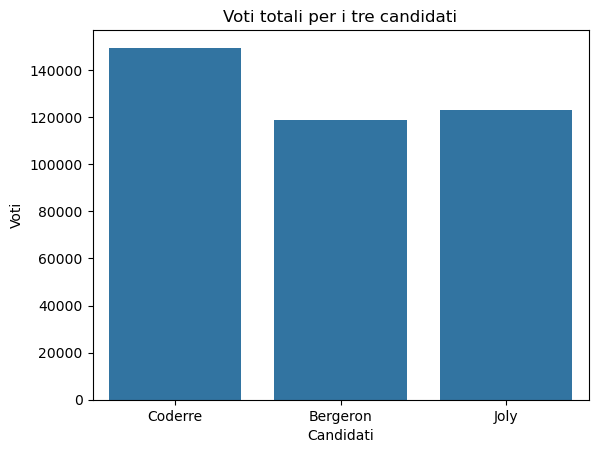

In [211]:
sns.barplot(data=df_voti, x="Nome", y="Voti")
plt.title("Voti totali per i tre candidati")
plt.xlabel("Candidati")
plt.ylabel("Voti")

Il grafico mostra che il candidato che ha ottenuto la maggior parte dei voti, data dalla somma dei voti ottenuti da ciascun distretto è Coderre, 
seguito da Joly e a breve distanza da quest'ultimo Bergeron

In [214]:
df_dieci = df.head(10)
df_dieci

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112
5,113-Jeanne-Mance,1455,3599,2316,7370,Bergeron,plurality,113
6,12-Saint-Sulpice,3252,2521,2543,8316,Coderre,plurality,12
7,121-La Pointe-aux-Prairies,5456,1760,3330,10546,Coderre,majority,121
8,122-Pointe-aux-Trembles,4734,1879,2852,9465,Coderre,majority,122
9,123-Rivière-des-Prairies,5737,958,1656,8351,Coderre,majority,123


Text(0, 0.5, 'Distretti')

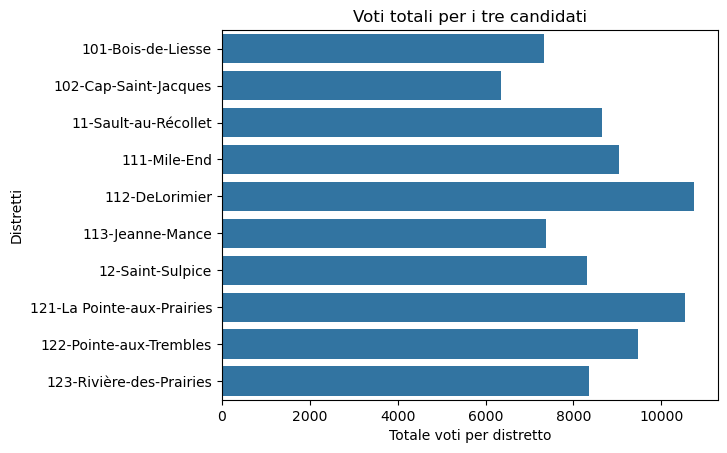

In [218]:
#Confronto con un grafico a barre il numero di votanti per i primi dieci distretti
sns.barplot(data=df_dieci, x="total", y="district")
plt.title("Voti totali per i tre candidati")
plt.xlabel("Totale voti per distretto")
plt.ylabel("Distretti")

Dal grafico emerge che il distretto che ha avuto una maggiore affluenza di votazioni è quello di 112-DeLorimier, seguito subito dopo, per una piccolissima
differenza dal distretto di 121-La Pointe-aux-Prairies.
Il distretto che ha avuto una minore affluenza rispetto a quelli osservati è 102-Cap-Saint-Jacques, avendo un numero di votazioni che è quasi la metà dei 
distretti in cui si è verificato un numero di votazioni maggiormente alto.
Tutti gli altri distretti si mantengono più o meno sulla stessa affluenza di voto.

Esercizio 5
Scarichiamo i file party_in_nyc.csv dal dataset https://www.kaggle.com/datasets/somesnm/partynyc relativo a quante volte è stata chiamata la polizia per delle feste eccessivamente rumorose:
Realizziamo un grafico che mostra quante chiamate ci sono state per ogni città per tutti i tipi di locale
Qual è il rettangolo di latitudine e longitudine considerato dal dataset?
Quante segnalazioni sono state fatte per case private?
Con Seaborn visualizziamo il conteggio delle segnalazioni avvenute in ogni quartiere; che succede se aggiungiamo il parametro hue="Location Type"?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\Franco\\Desktop\\Leti\\party_in_nyc.csv")
df

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
...,...,...,...,...,...,...,...,...
225409,2016-12-31 23:53:57,2017-01-01 00:01:41,Store/Commercial,10003.0,NEW YORK,MANHATTAN,40.730073,-73.986585
225410,2016-12-31 23:55:01,2017-01-01 02:05:06,Residential Building/House,10032.0,NEW YORK,MANHATTAN,40.833144,-73.944617
225411,2016-12-31 23:56:20,2017-01-01 13:34:00,Residential Building/House,11104.0,SUNNYSIDE,QUEENS,40.743662,-73.923067
225412,2016-12-31 23:56:41,2017-01-01 03:49:12,Residential Building/House,10040.0,NEW YORK,MANHATTAN,40.858447,-73.929279


In [4]:
df.head()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225414 entries, 0 to 225413
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Created Date   225414 non-null  object 
 1   Closed Date    224619 non-null  object 
 2   Location Type  225414 non-null  object 
 3   Incident Zip   224424 non-null  float64
 4   City           224424 non-null  object 
 5   Borough        225414 non-null  object 
 6   Latitude       223946 non-null  float64
 7   Longitude      223946 non-null  float64
dtypes: float64(3), object(5)
memory usage: 13.8+ MB


In [6]:
df.isna().sum()

Created Date        0
Closed Date       795
Location Type       0
Incident Zip      990
City              990
Borough             0
Latitude         1468
Longitude        1468
dtype: int64

In [14]:
df = df.dropna(subset=["City", "Incident Zip", "Latitude", "Longitude", "Closed Date"])
#per avere un dataset completo e pulito elimino le righe per le quali il valore di quel campo non è presente

In [16]:
df.isna().sum()

Created Date     0
Closed Date      0
Location Type    0
Incident Zip     0
City             0
Borough          0
Latitude         0
Longitude        0
dtype: int64

In [ ]:
#Grafico che mostra quante chiamate ci sono state per ogni città per tutti i tipi di locale

In [17]:
df_raggruppato = df.groupby(["Location Type", "City"]).size()
df_raggruppato

Location Type        City         
Club/Bar/Restaurant  ASTORIA           678
                     BAYSIDE            34
                     BELLEROSE           1
                     BREEZY POINT        1
                     BRONX            1026
                                      ... 
Street/Sidewalk      STATEN ISLAND     435
                     SUNNYSIDE          46
                     WHITESTONE        101
                     WOODHAVEN          91
                     WOODSIDE          146
Length: 246, dtype: int64

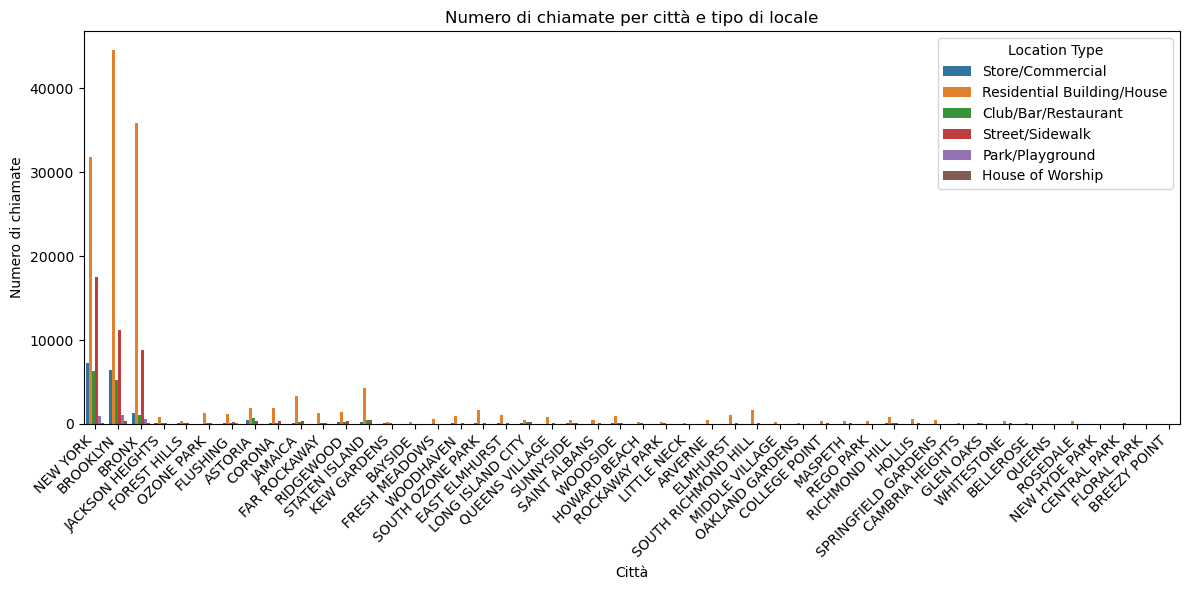

In [22]:
plt.figure(figsize=(12, 6))  # allarga il grafico
sns.countplot(data=df, x="City", hue = "Location Type")
plt.title("Numero di chiamate per città e tipo di locale")
plt.xlabel("Città")
plt.ylabel("Numero di chiamate")
plt.xticks(rotation=45, ha="right")  # etichette leggibili

plt.tight_layout()  # evita che le etichette escano fuori dal grafico
plt.show()

Il grafico evidenzia che le città con il maggior numero di chiamate sono state Brooklyn, New York e Bronx. Tutte e tre mostrano che le chiamate sono state effettuate principalmente per feste organizzate in residenze private

In [ ]:
#Calcolo il rettangolo di latitudine e longitudine considerato dal dataset

In [24]:
min_lat = df["Latitude"].min()
max_lat = df["Latitude"].max()
min_lon = df["Longitude"].min()
max_lon = df["Longitude"].max()

print("Latitudine: da", min_lat, "a", max_lat)
print("Longitudine: da", min_lon, "a", max_lon)

Latitudine: da 40.498819681472185 a 40.91217840308113
Longitudine: da -74.25127710072611 a -73.70230256557906


In [ ]:
#Calcolo quante segnalazioni sono state fatte per case private

In [26]:
filtro = df["Location Type"].str.contains("Residential Building/House", case = False, na = False)
df_filtrato = df.loc[filtro]
segnalazioni_caseprivate = df_filtrato.groupby("Location Type").size()
segnalazioni_caseprivate

Location Type
Residential Building/House    145350
dtype: int64

In [ ]:
#Visualizzo il conteggio delle segnalazioni avvenute in ogni quartiere, aggiungendo il parametro hue="Location Type"

In [27]:
df_raggruppato = df.groupby("Borough").size()
df_raggruppato

Borough
BRONX            47595
BROOKLYN         68757
MANHATTAN        63883
QUEENS           38224
STATEN ISLAND     5402
dtype: int64

Text(0, 0.5, 'Numero di chiamate')

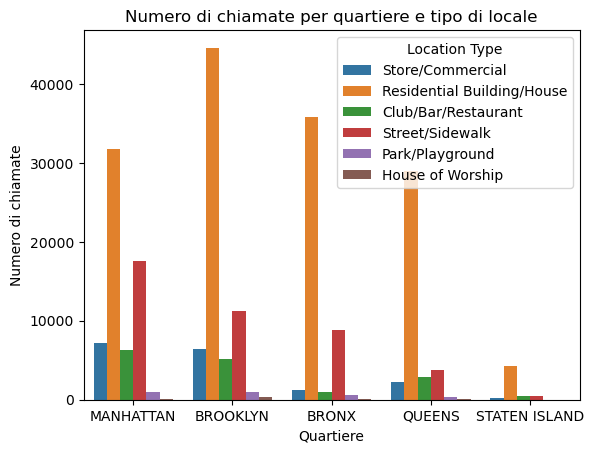

In [28]:
sns.countplot(data=df, x="Borough", hue = "Location Type")
plt.title("Numero di chiamate per quartiere e tipo di locale")
plt.xlabel("Quartiere")
plt.ylabel("Numero di chiamate")

Il grafico evidenzia che il quartiere con il maggior numero di chiamate sono Brooklyn e Manhattan. 
Le chiamate sono state effettuate principalmente per feste organizzate in residenze private